In [59]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn

In [60]:
import numpy as np
import seaborn as sns
from typing import List

#agregamos lo siguiente
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Práctica 5: Introducción a  Modelos Autoregresivos y de Medias Móviles

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones.

La entrega de la práctica será en la siguiente sesión a menos que la indicación sea otra. La revisión iniciará al iniciar la sesión y únicamente podrá ser evaluada durante la duración de la sesión.

## Asignación 1

Implementa la función descrita debajo para simular el proceso autoregresivo dado por

$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + W_t
$$

In [61]:
def simulate_auto_regressive_process(
    parameters: List[float]=[0.9],
    timesteps: int=100, 
    mean: float=0.,
    std: float=1.
):
    
    '''
    This function simulates an AR(p) processwith mean 0. (Esta funcion simula un proceso AR(p) con media 0)
    
    Inputs:
        parameters: A list of the parameters phi used to compute the autoregression simulation. (Una lista de parametros PHI usados para clacular la siluacion de autoregresion)
                    The first parameter is associated with the time t-1, the second with t-2 and soon. (El primer parametro is asociado con el tiempo t-1 y asi susecivamente)
        timesteps: The number of timesteps to simulate. The first p values of the simulation must (El numero de pasos de tiempo para la simulacion, que son P valores)
                    be set to zero (initial conditions). (deben ser cero al inciar, como condiciones inciales)
        mean: The mean used to sample the white noise (La media usada para muestrear el ruido blanco)
        std: The standard deviation used to sample the white noise (La desviacion estandar o raiz cuadrada de la varianza usada para muestra el rudio blanco)
    Output:
        The time series simulation (La simulacion de la serie de tiempo)
    '''
        # Generamos ruido blanco con media cero y desviación estándar std
    noise = np.random.normal(loc=0, scale=std, size=timesteps)
    print("White Noise: \n",noise)
    # Inicializamos la serie temporal con ceros, para su creacion
    ar_series = np.ones(timesteps)
    
    # Generamos la serie temporal autorregresiva
    for i in range(len(parameters), timesteps):
        ar_series[i] = np.sum(np.flip(ar_series[i-len(parameters):i]) * np.array(parameters)) 
        #+ noise[i] # np.flip es para imvertir el arreglo de rebanada que tomamos de ar_series
    # Despues cada valor del vector lo multiplicamos por cada uno de los parametro dados, finalmente sumamos el ruido blanco
    # Agregamos la media y devolvemos la serie temporal generada
    return ar_series + mean

simulate_auto_regressive_process([0.9],100,0,1)

White Noise: 
 [ 0.64205469 -1.97788793  0.71226464  2.59830393 -0.02462598  0.03414213
  0.17954948 -1.86197571  0.42614664 -1.60540974 -0.4276796   1.24286955
 -0.73521696  0.50124899  1.01273905  0.27874086 -1.37094847 -0.33247528
  1.95941134 -2.02504576 -0.27578601 -0.55210807  0.12074736  0.74821562
  1.60869097 -0.27023239  0.81234133  0.49974014  0.4743473  -0.56392393
 -0.99732147 -1.10004311 -0.75643721  0.32168658  0.76094939  0.32346885
 -0.5489551   1.80597011  1.51886562 -0.35400011 -0.82343141  0.13021495
  1.26729865  0.33276498  0.5565487  -0.21208012  0.4562709   1.54454445
 -0.23966878  0.14330773  0.25381648  0.28372536 -1.41188888 -1.87686866
 -1.01965507  0.1679423   0.55385617 -0.53067456  1.37725748 -0.14317597
  0.020316   -0.19396387  0.13402679  0.70447407  0.66565344 -0.89842294
  1.52366378 -1.09502646  0.07922701 -0.27439657 -1.04899168 -0.07512059
 -0.74081377  0.07290724  0.40308596  1.47192937  0.30738422 -0.61122534
 -0.39161981  0.13997811  0.09346083

array([1.00000000e+00, 9.00000000e-01, 8.10000000e-01, 7.29000000e-01,
       6.56100000e-01, 5.90490000e-01, 5.31441000e-01, 4.78296900e-01,
       4.30467210e-01, 3.87420489e-01, 3.48678440e-01, 3.13810596e-01,
       2.82429536e-01, 2.54186583e-01, 2.28767925e-01, 2.05891132e-01,
       1.85302019e-01, 1.66771817e-01, 1.50094635e-01, 1.35085172e-01,
       1.21576655e-01, 1.09418989e-01, 9.84770902e-02, 8.86293812e-02,
       7.97664431e-02, 7.17897988e-02, 6.46108189e-02, 5.81497370e-02,
       5.23347633e-02, 4.71012870e-02, 4.23911583e-02, 3.81520424e-02,
       3.43368382e-02, 3.09031544e-02, 2.78128389e-02, 2.50315550e-02,
       2.25283995e-02, 2.02755596e-02, 1.82480036e-02, 1.64232033e-02,
       1.47808829e-02, 1.33027946e-02, 1.19725152e-02, 1.07752637e-02,
       9.69773730e-03, 8.72796357e-03, 7.85516721e-03, 7.06965049e-03,
       6.36268544e-03, 5.72641690e-03, 5.15377521e-03, 4.63839769e-03,
       4.17455792e-03, 3.75710213e-03, 3.38139191e-03, 3.04325272e-03,
      

Interpretacion de lo anterior:

Generamos un ruido blanco para modelar la aleatoridad de las series estacionarias.

$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + W_t
$$

El modelo autoregresivo que estamos modelando es para AR(1) ya que solo tenemos un parametro, es decir, solo tenemos a phi_1 = 0.9

Por lo que nuestro modelo quedaria de la siguiente forma:

$$
AR(1) = X_t = \phi_1 X_{t-1} +  W_t
$$

Al hacer los calculos queda de la siguiente forma nuestro modelo.

## Asignación 2

Grafique la simulación de la serie de tiempo del modelo autoregresivo con los parámetros indicados por el profesor. A la derecha de la serie de tiempo debe graficar el correlograma para el proceso simulado.

White Noise: 
 [-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


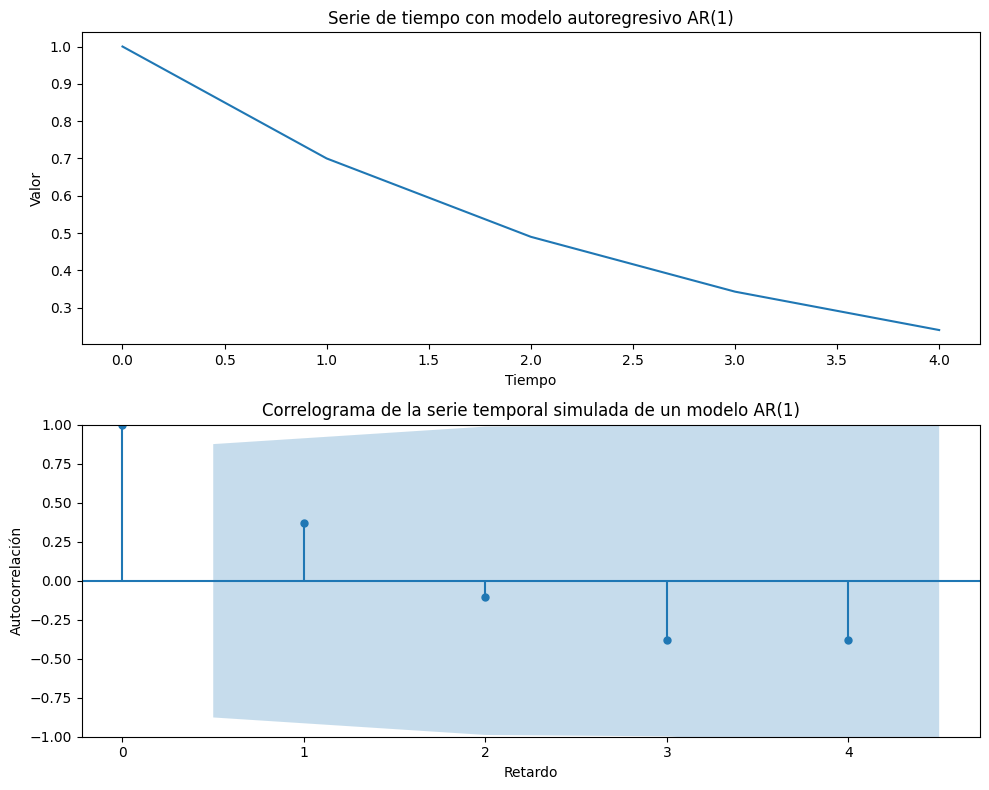

In [62]:
# Definir los parámetros del modelo
phi = [0.7]
p = len(phi)
timesteps = 5
mean = 0
std = 1

# Generar la serie temporal utilizando la función simulate_auto_regressive_process()
np.random.seed(123)
ar_series = simulate_auto_regressive_process(parameters=phi, timesteps=timesteps, mean=mean, std=std)

# Calcular la autocorrelación de la serie de tiempo
acf, _ = sm.tsa.stattools.acf(ar_series, nlags=2, fft=False, alpha=0.05)

# Graficar la serie de tiempo y su autocorrelación
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
ax[0].plot(ar_series)
ax[0].set_title(f"Serie de tiempo con modelo autoregresivo AR({p})")
ax[0].set_xlabel("Tiempo")
ax[0].set_ylabel("Valor")
sm.graphics.tsa.plot_acf(ar_series, lags=timesteps-1, alpha=0.05, ax=ax[1])
ax[1].set_title(f"Correlograma de la serie temporal simulada de un modelo AR({p})")
ax[1].set_xlabel("Retardo")
ax[1].set_ylabel("Autocorrelación")
plt.tight_layout()
plt.show()

## Asignación 3

Implementa la función descrita debajo para simular el proceso de medias móviles dado 

$$
X_t = W_t + \theta_1 W_{t-1} + \theta_2 W_{t-2} + \cdots + \theta_q W_{t-q}
$$

In [63]:
def simulate_moving_averages_process(
    parameters: List[float]=[0.9], 
    timesteps: int=100, 
    mean: float=0.,
    std: float=1.
    ):
    
    '''
    This function simulates an MA(q) process with mean 0.
    
    Inputs:
        parameters: A list of the parameters theta used to compute the moving averages simulation
        timesteps: The number of timesteps to simulate.
        mean: The mean used to sample the white noise
        std: The standard deviation used to sample the white noise
    Output:
        The time series simulation
    '''
    
    # Generamos ruido blanco con media cero y desviación estándar std
    noise = np.random.normal(loc=mean, scale=std, size=timesteps)
    print("El ruido blanco generado es:  \n", noise)
    
    # Inicializamos la serie temporal con ceros
    ma_series = np.zeros(timesteps)
    
    # Generamos la serie temporal de la media móvil
    for i in range(len(parameters), timesteps):
        ma_series[i] = np.sum(np.flip(noise[i-len(parameters):i]) * np.array(parameters)) + noise[i]
        
    # Agregamos la media y devolvemos la serie temporal generada
    return ma_series + mean

simulate_moving_averages_process([0.9], 100, 0, 1)

El ruido blanco generado es:  
 [ 1.65143654 -2.42667924 -0.42891263  1.26593626 -0.8667404  -0.67888615
 -0.09470897  1.49138963 -0.638902   -0.44398196 -0.43435128  2.20593008
  2.18678609  1.0040539   0.3861864   0.73736858  1.49073203 -0.93583387
  1.17582904 -1.25388067 -0.6377515   0.9071052  -1.4286807  -0.14006872
 -0.8617549  -0.25561937 -2.79858911 -1.7715331  -0.69987723  0.92746243
 -0.17363568  0.00284592  0.68822271 -0.87953634  0.28362732 -0.80536652
 -1.72766949 -0.39089979  0.57380586  0.33858905 -0.01183049  2.39236527
  0.41291216  0.97873601  2.23814334 -1.29408532 -1.03878821  1.74371223
 -0.79806274  0.02968323  1.06931597  0.89070639  1.75488618  1.49564414
  1.06939267 -0.77270871  0.79486267  0.31427199 -1.32626546  1.41729905
  0.80723653  0.04549008 -0.23309206 -1.19830114  0.19952407  0.46843912
 -0.83115498  1.16220405 -1.09720305 -2.12310035  1.03972709 -0.40336604
 -0.12602959 -0.83751672 -1.60596276  1.25523737 -0.68886898  1.66095249
  0.80730819 -0.314

array([ 0.        , -0.94038636, -2.61292395,  0.87991489,  0.27260223,
       -1.45895251, -0.70570651,  1.40615155,  0.70334867, -1.01899376,
       -0.83393504,  1.81501393,  4.17212316,  2.97216138,  1.28983491,
        1.08493634,  2.15436375,  0.40582496,  0.33357856, -0.19563453,
       -1.7662441 ,  0.33312884, -0.61228602, -1.42588135, -0.98781674,
       -1.03119878, -3.02864654, -4.2902633 , -2.29425703,  0.29757292,
        0.66108051, -0.1534262 ,  0.69078404, -0.2601359 , -0.50795538,
       -0.55010193, -2.45249936, -1.94580234,  0.22199605,  0.85501433,
        0.29289965,  2.38171782,  2.5660409 ,  1.35035695,  3.11900574,
        0.72024368, -2.203465  ,  0.80880284,  0.77127827, -0.68857323,
        1.09603088,  1.85309076,  2.55652193,  3.0750417 ,  2.41547239,
        0.18974469,  0.09942482,  1.0296484 , -1.04342066,  0.22366013,
        2.08280568,  0.77200296, -0.19215099, -1.408084  , -0.87894696,
        0.64801079, -0.40955978,  0.41416456, -0.0512194 , -3.11

## Asignación 2

Grafique la simulación de la serie de tiempode medias móviles con los parámetros indicados por el profesor. A la derecha de la serie de tiempo debe graficar el correlograma para el proceso simulado.

El ruido blanco generado es:  
 [-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263  1.26593626 -0.8667404  -0.67888615 -0.09470897
  1.49138963 -0.638902   -0.44398196 -0.43435128  2.20593008  2.18678609
  1.0040539   0.3861864   0.73736858  1.49073203 -0.93583387  1.17582904
 -1.25388067 -0.6377515   0.9071052  -1.4286807  -0.14006872 -0.8617549
 -0.25561937 -2.79858911 -1.7715331  -0.69987723  0.92746243 -0.17363568
  0.00284592  0.68822271 -0.87953634  0.28362732 -0.80536652 -1.72766949
 -0.39089979  0.57380586  0.33858905 -0.01183049  2.39236527  0.41291216
  0.97873601  2.23814334 -1.29408532 -1.03878821  1.74371223 -0.79806274
  0.02968323  1.06931597  0.89070639  1.75488618  1.49564414  1.06939267
 -0.77270871  0.79486267  0.31427199 -1.32626546  1.41729905  0.80723653
  0.04549008 -0.23309206 -1.19830114  0.19952407  0.46843912 -0.83115498
  1.16220405 -1.09720305 -2.12310035  1.03972709 -0.40336604 -0.12602959
 -0.83751672 -1.6059

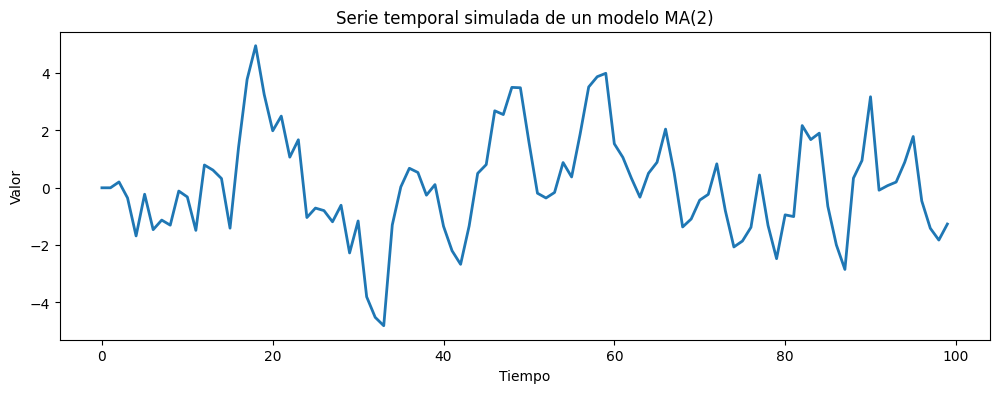

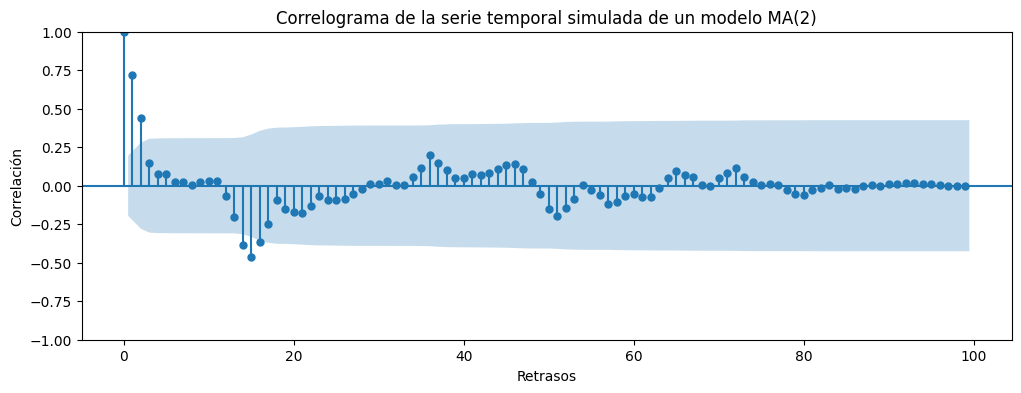

In [64]:
# Parámetros del modelo MA(2)
theta = [0.9]*2
p = len(theta)
timesteps = 100
mean = 0
std = 1

# asignamos una semilla
np.random.seed(123)

# Smulamos la serie temporal con el modelo de MA
ma_series = simulate_moving_averages_process(theta, timesteps, mean, std)

# Graficamos la serie temporal
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(ma_series, linewidth=2)
ax.set(title=f'Serie temporal simulada de un modelo MA({p})',
       xlabel='Tiempo', 
       ylabel='Valor')

# Calculamos y graficamos el correlograma
fig, ax = plt.subplots(figsize=(12, 4))
acf, confint = sm.tsa.stattools.acf(ma_series, nlags=timesteps-1, fft=False, alpha=0.05)
sm.graphics.tsa.plot_acf(ma_series, ax=ax, lags=timesteps-1, alpha=0.05)
ax.set(title=f'Correlograma de la serie temporal simulada de un modelo MA({p})',
       xlabel='Retrasos',
       ylabel='Correlación')
plt.show()